# Artificial Neural Networks

In [4]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

battery = pd.read_csv('Final Database.csv')
battery = battery.drop(columns="Unnamed: 0")
battery.dtypes

# Assuming 'battery' is your DataFrame containing the dataset

# Features (X)
X = battery.drop(columns=['RUL'])

# Target variable (y)
y = battery['RUL']

## Standardization

Standardization of a dataset is a common requirement for many machine learning estimators. Because they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance). Therefore we standardize them:

The standard value of a feature (lets call it $feature_i$) is calculated as:

$z_i = (feature_i - u_i) / s_i$

where $u_i$ is the mean of $feature_i$ over all samples, and $s_i$ is the standard deviation of $feature_i$ over all samples.

In [9]:
# standardize the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# inspect the first 5 rows of the first 5 columns in X_train
X_scaled[:5, :5]

array([[-1.72211691, -0.05992153, -0.00587111, -2.61731252, -2.96630215],
       [-1.71901486,  0.08530832, -0.00447315,  3.71233279, -2.89354   ],
       [-1.71591282,  0.08485935, -0.00843087,  3.74529969, -2.86120127],
       [-1.71281077,  0.08461013, -0.0106033 ,  3.75628866, -2.85311658],
       [-1.70660668,  1.82366221,  1.89996218,  4.19584736, -1.45446639]])

## Separate X, Y into different dataframes

In [10]:
# Now you can split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# inspect the shape of X_train, X_test, y_train, y_test
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (12051, 9)
X_test shape:  (3013, 9)
y_train shape:  (12051,)
y_test shape:  (3013,)


Epoch 1/10
377/377 [==============================] - 1s 2ms/step - loss: 244703.7344 - val_loss: 25187.3477
Epoch 2/10
377/377 [==============================] - 0s 1ms/step - loss: 18566.3652 - val_loss: 7201.7725
Epoch 3/10
377/377 [==============================] - 0s 1ms/step - loss: 9294.2539 - val_loss: 2500.1831
Epoch 4/10
377/377 [==============================] - 0s 1ms/step - loss: 6633.8281 - val_loss: 1357.9181
Epoch 5/10
377/377 [==============================] - 0s 1ms/step - loss: 5950.7119 - val_loss: 840.0529
Epoch 6/10
377/377 [==============================] - 0s 1ms/step - loss: 5687.9468 - val_loss: 605.5611
Epoch 7/10
377/377 [==============================] - 0s 1ms/step - loss: 5413.2910 - val_loss: 611.0717
Epoch 8/10
377/377 [==============================] - 0s 1ms/step - loss: 5277.3672 - val_loss: 507.5258
Epoch 9/10
377/377 [==============================] - 0s 1ms/step - loss: 5217.6582 - val_loss: 576.8488
Epoch 10/10
377/377 [==========================

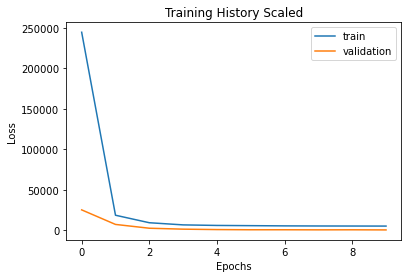

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the architecture of the neural network
model_ann = Sequential([
    Dense(64, input_dim=24, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')
])

# Compile the model
model_ann.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model_ann.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Plot the training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')

plt.title('Training History Scaled')
# Add labels to the plot
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

95/95 [==============================] - 0s 1ms/step - loss: 417.3723
Mean Squared Error on test data:  417.37225341796875
95/95 [==============================] - 0s 609us/step


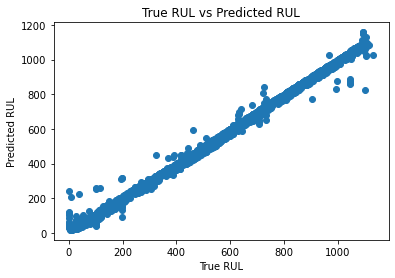

       True RUL  Predicted RUL
8692       1043    1035.940918
4489        956     925.528748
8163        469     461.995178
13837       176     176.466827
7709        943     941.796326
...         ...            ...
4783        645     588.378113
12314       632     621.306458
8962        772     771.082336
5981        491     481.041046
1042         33      48.147236

[3013 rows x 2 columns]


In [12]:
# Evaluate the model
loss = model_ann.evaluate(X_test, y_test)
print("Mean Squared Error on test data: ", loss)

# Make predictions
y_pred = model_ann.predict(X_test)

# Plot the predictions
plt.scatter(y_test, y_pred)
plt.xlabel('True RUL')
plt.ylabel('Predicted RUL')
plt.title('True RUL vs Predicted RUL')
plt.show()

# Show true RUL vs predicted RUL
results = pd.DataFrame({'True RUL': y_test, 'Predicted RUL': y_pred.flatten()})
print(results)

## What happens if we don't standardize the data?

In [57]:
# use unscaled data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# inspect the shape of X_train, X_test, y_train, y_test
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (12051, 9)
X_test shape:  (3013, 9)
y_train shape:  (12051,)
y_test shape:  (3013,)


Epoch 1/20
377/377 [==============================] - 1s 1ms/step - loss: 228679.8906 - val_loss: 23217.5781
Epoch 2/20
377/377 [==============================] - 0s 1ms/step - loss: 16604.4258 - val_loss: 5715.2158
Epoch 3/20
377/377 [==============================] - 1s 1ms/step - loss: 8228.8105 - val_loss: 1999.3916
Epoch 4/20
377/377 [==============================] - 0s 1ms/step - loss: 6312.7905 - val_loss: 1123.6362
Epoch 5/20
377/377 [==============================] - 0s 1ms/step - loss: 5862.1865 - val_loss: 901.9979
Epoch 6/20
377/377 [==============================] - 0s 1ms/step - loss: 5549.2041 - val_loss: 736.1371
Epoch 7/20
377/377 [==============================] - 0s 1ms/step - loss: 5554.7905 - val_loss: 714.1837
Epoch 8/20
377/377 [==============================] - 0s 1ms/step - loss: 5333.3716 - val_loss: 592.8619
Epoch 9/20
377/377 [==============================] - 1s 1ms/step - loss: 5118.8623 - val_loss: 512.8801
Epoch 10/20
377/377 [==========================

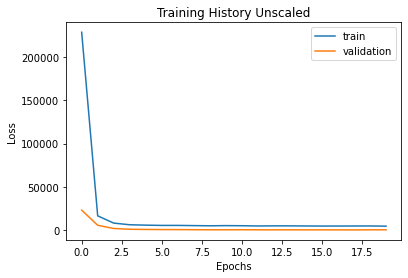

In [19]:
# Define the architecture of the neural network
model_ann = Sequential([
    Dense(64, input_dim=24, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')
])

# Compile the model
model_ann.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model_ann.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Plot the training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')

plt.title('Training History Unscaled')
# Add labels to the plot
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

95/95 [==============================] - 0s 713us/step - loss: 481.6450
Mean Squared Error on test data:  481.64495849609375
95/95 [==============================] - 0s 577us/step


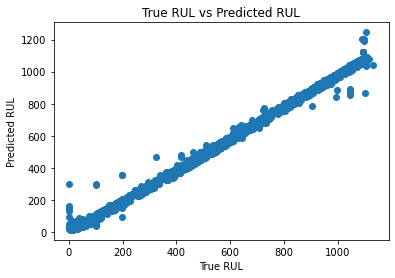

       True RUL  Predicted RUL
8692       1043    1026.812622
4489        956     916.521790
8163        469     458.081573
13837       176     167.489151
7709        943     932.494812
...         ...            ...
4783        645     587.120911
12314       632     616.592346
8962        772     762.552917
5981        491     478.575592
1042         33      41.098293

[3013 rows x 2 columns]


In [21]:
# Evaluate the model
loss = model_ann.evaluate(X_test, y_test)
print("Mean Squared Error on test data: ", loss)

# Make predictions
y_pred = model_ann.predict(X_test)

# Plot the predictions
plt.scatter(y_test, y_pred)
plt.xlabel('True RUL')
plt.ylabel('Predicted RUL')
plt.title('True RUL vs Predicted RUL')
plt.show()

# Show true RUL vs predicted RUL
results = pd.DataFrame({'True RUL': y_test, 'Predicted RUL': y_pred.flatten()})
print(results)

Epoch 1/100
377/377 [==============================] - 1s 1ms/step - loss: 399884.2500 - val_loss: 380525.8750
Epoch 2/100
377/377 [==============================] - 0s 1ms/step - loss: 379000.4062 - val_loss: 360090.6875
Epoch 3/100
377/377 [==============================] - 0s 1ms/step - loss: 358641.5000 - val_loss: 340871.8438
Epoch 4/100
377/377 [==============================] - 0s 1ms/step - loss: 339576.0938 - val_loss: 322594.0000
Epoch 5/100
377/377 [==============================] - 0s 1ms/step - loss: 321365.7812 - val_loss: 305044.9688
Epoch 6/100
377/377 [==============================] - 0s 1ms/step - loss: 304466.5938 - val_loss: 289072.5000
Epoch 7/100
377/377 [==============================] - 0s 1ms/step - loss: 288581.5625 - val_loss: 274097.3438
Epoch 8/100
377/377 [==============================] - 0s 1ms/step - loss: 273761.8438 - val_loss: 259921.7812
Epoch 9/100
377/377 [==============================] - 0s 1ms/step - loss: 259865.7500 - val_loss: 246522.3438
E

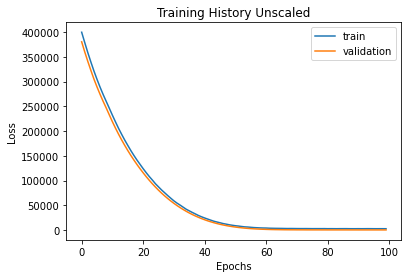

In [24]:
# Define the architecture of the neural network
model_ann = Sequential([
    Dense(64, input_dim=24, activation='sigmoid', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='sigmoid'),
    Dropout(0.2),
    Dense(1, activation='linear')
])

# Compile the model
model_ann.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model_ann.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Plot the training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')

plt.title('Training History Unscaled')
# Add labels to the plot
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

95/95 [==============================] - 0s 682us/step - loss: 130121.3438
Mean Squared Error on test data:  130121.34375
95/95 [==============================] - 0s 621us/step


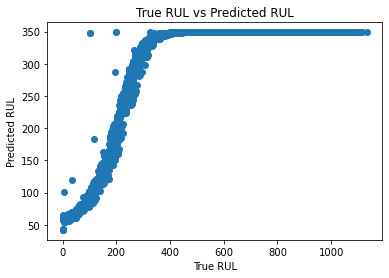

       True RUL  Predicted RUL
8692       1043     348.946686
4489        956     348.946686
8163        469     348.935059
13837       176     161.110535
7709        943     348.946686
...         ...            ...
4783        645     348.946655
12314       632     348.946625
8962        772     348.946686
5981        491     348.938873
1042         33      66.699387

[3013 rows x 2 columns]


In [23]:
# Evaluate the model
loss = model_ann.evaluate(X_test, y_test)
print("Mean Squared Error on test data: ", loss)

# Make predictions
y_pred = model_ann.predict(X_test)

# Plot the predictions
plt.scatter(y_test, y_pred)
plt.xlabel('True RUL')
plt.ylabel('Predicted RUL')
plt.title('True RUL vs Predicted RUL')
plt.show()

# Show true RUL vs predicted RUL
results = pd.DataFrame({'True RUL': y_test, 'Predicted RUL': y_pred.flatten()})
print(results)

## T-SNE dimensionality reduction
T-SNE is a dimensionality reduction technique that is particularly well suited for the visualization of high-dimensional datasets. The idea is to project the data from a high-dimensional space into a lower-dimensional space, typically the 2D plane, in such a way that similar samples are mapped to nearby points and dissimilar samples are mapped to distant points. In contrast to PCA, T-SNE is not a mathematical technique, but a probabilistic one. It is based on the minimization of the Kullback-Leibler divergence between the input and the output similarities, which makes it particularly well suited for the visualization of high-dimensional datasets:
$p_{j|i} = \frac{exp(-||x_i - x_j||^2 / 2\sigma_i^2)}{\sum_{k \neq i} exp(-||x_i - x_k||^2 / 2\sigma_i^2)}$ and $p_{ij} = \frac{p_{j|i} + p_{i|j}}{2n}$

/home/thetruehooha/.venvs/vimJupy/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/thetruehooha/.venvs/vimJupy/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


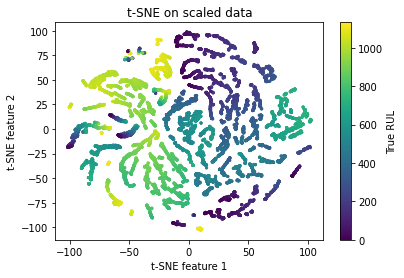

In [62]:
# t-SNE on scaled data
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# plot the t-SNE features, colors being the true RUL
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', s=5)
plt.title('t-SNE on scaled data')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.colorbar(label='True RUL')
plt.show()

/home/thetruehooha/.venvs/vimJupy/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/thetruehooha/.venvs/vimJupy/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


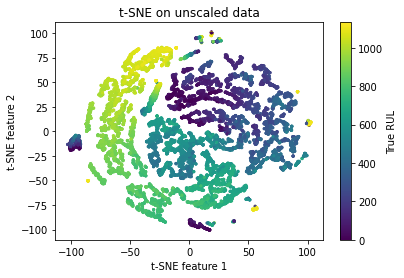

In [64]:
# t-SNE on unscaled data
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# plot the t-SNE features, colors being the true RUL
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', s=5)
plt.title('t-SNE on unscaled data')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.colorbar(label='True RUL')
plt.show()